<a href="https://colab.research.google.com/github/songwoojin04/machine2/blob/main/3week/weather_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

weather = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/3주차/weather.csv")
weather

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,11/1/2007,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,11/2/2007,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,11/3/2007,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,11/4/2007,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,11/5/2007,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,10/27/2008,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,10/28/2008,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,10/29/2008,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,10/30/2008,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [111]:
weather['RainTomorrow'].value_counts()

,count
RainTomorrow,
No,300
Yes,66


Text(0.5, 1.0, 'Label')

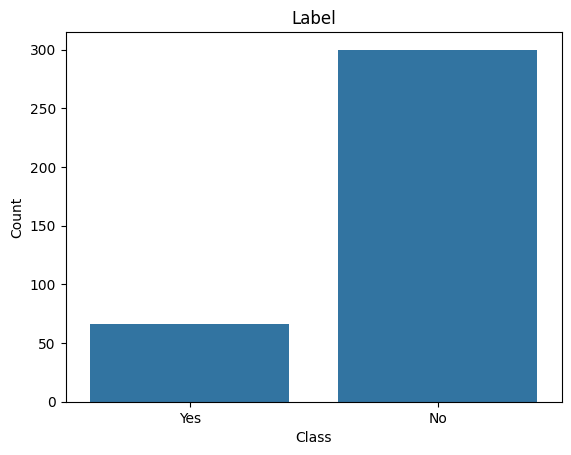

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = weather, x="RainTomorrow")
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Label")

In [113]:
weather.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,3
WindGustDir,3
WindGustSpeed,2
WindDir9am,31


In [114]:
weather = weather.dropna()
weather.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [115]:
label_encoders = {}
weather = weather.copy()
for column in weather.columns:
    label_encoders[column] = LabelEncoder()
    weather.loc[:, column] = label_encoders[column].fit_transform(weather[column])


In [116]:
x = weather.drop(columns="RainTomorrow")
y = weather["RainTomorrow"]

x

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,59,0,90.0,111.0,0.0,15.0,43.0,7,8.0,12,...,29,15,93.0,82.0,7,7,95.0,129.0,0,16.0
1,70,0,138.0,130.0,16.0,20.0,75.0,1,12.0,0,...,41,22,37.0,27.0,5,3,123.0,145.0,1,16.0
2,81,0,135.0,106.0,16.0,27.0,24.0,7,33.0,3,...,43,55,20.0,22.0,8,7,103.0,99.0,1,43.0
3,83,0,133.0,42.0,43.0,34.0,69.0,7,20.0,14,...,23,42,7.0,21.0,2,7,88.0,50.0,1,13.0
4,84,0,86.0,46.0,13.0,26.0,84.0,10,18.0,10,...,29,35,84.0,113.0,7,7,68.0,60.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,47,0,100.0,152.0,0.0,36.0,99.0,6,29.0,10,...,1,2,64.0,46.0,1,3,148.0,167.0,0,0.0
362,48,0,81.0,141.0,0.0,51.0,104.0,3,17.0,6,...,6,8,95.0,98.0,0,1,120.0,160.0,0,0.0
363,49,0,125.0,78.0,0.0,40.0,36.0,2,14.0,1,...,24,33,131.0,147.0,3,2,96.0,81.0,0,0.0
364,51,0,125.0,130.0,0.0,23.0,50.0,7,16.0,11,...,30,25,103.0,91.0,6,7,107.0,146.0,0,0.0


In [117]:
y

,RainTomorrow
0,1
1,1
2,1
3,1
4,0
...,...
361,0
362,0
363,0
364,0


In [118]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((262, 23), (66, 23), (262,), (66,))

In [134]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=250, random_state=42)
lr = LinearRegression()

dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
lr.fit(x_train, y_train)

dt_y_pred = dt.predict(x_test)
rf_y_pred = rf.predict(x_test)
lr_y_pred = lr.predict(x_test).astype(int)


In [135]:
dt_y_pred

array([0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.])

In [138]:
dt_acc = accuracy_score(y_test, dt_y_pred)
rf_acc = accuracy_score(y_test, rf_y_pred )
lr_acc = accuracy_score(y_test, lr_y_pred)

print(f"Decision Tree : {accuracy_score(y_test, dt_y_pred):.4f}")
print(confusion_matrix(y_test, dt_y_pred))

print(f"Random Forest : {accuracy_score(y_test, rf_y_pred):.4f}")
print(confusion_matrix(y_test, rf_y_pred))

print(f"Logistic Regression : {accuracy_score(y_test, lr_y_pred):.4f}")
print(confusion_matrix(y_test, lr_y_pred))

Decision Tree : 1.0000
[[54  0]
 [ 0 12]]
Random Forest : 1.0000
[[54  0]
 [ 0 12]]
Logistic Regression : 0.8636
[[54  0]
 [ 9  3]]
